# Characterizations of Humpback Chub Populations Affected by Streamflow
### by A. Melega, E. Ross, K. Gonzalez

The Humpback Chub is a native species of fish of the Colorado River Basin, protected under the Endangered Species Act due to the effects of dams and human water use on river flow & habitat. As precipitation changes due to climate change and other effects, it is important to understand how changing levels in precipitation will affect species populations and the greater ecosystem. 

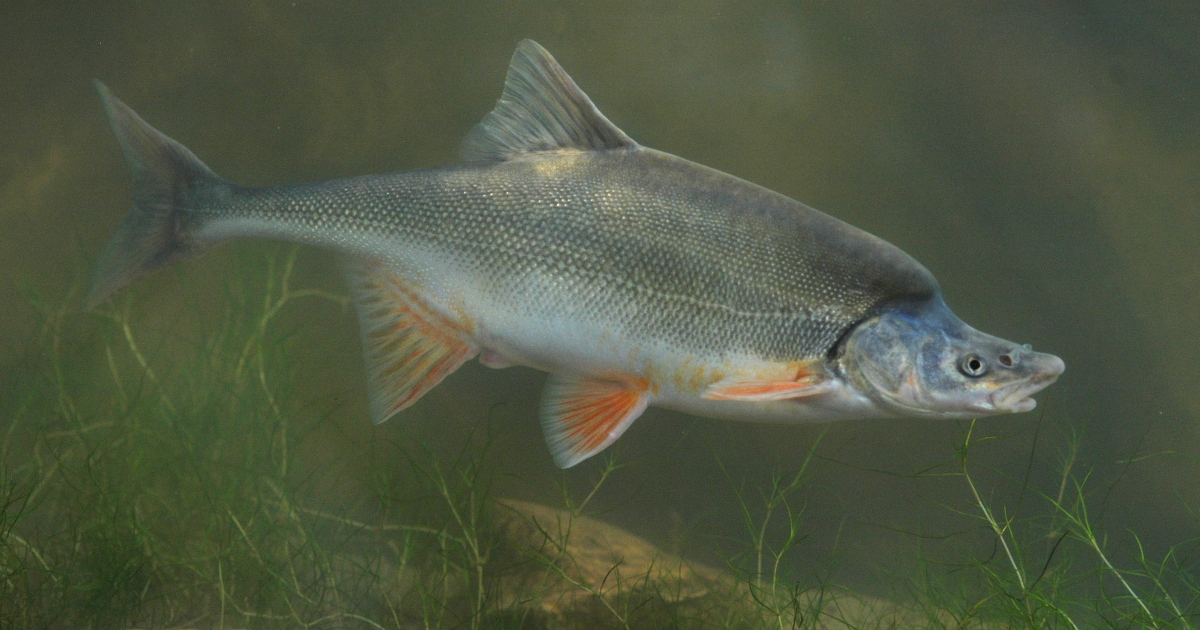

**Research Question:** How does the change in streamflow due to climatic factors in the Colorado River Basic impact the characteristics of the Humpback Chub?

In this project, we intend to successfully determine whether yearly trends in streamflow at certain locations along the Colorado River in Arizona have a noticeable difference in the size and length of captured fish.

## Datasets
**Humpback Chub**

*Dataset 1*: [Humpback chub (Gila cypha) capture histories and growth data for two areas in the Colorado River network]('../data/HBC_Length_Freq_Fig4.csv) <br>
Data was sourced from the USGS ScienceBase-Catalog. <br>

Features:
* Yearly log for fish length
* Data from 2014-2016
* No recorded time other than year
* Length of each fish recorded in millimeters [mm]
* Specific net (location) also recorded

Processing:
* Length and year were isolated from other data
* Separate length data according to year
* Convert length values to centimeters from millimeters
* Smooth the data by rounding each length value to the nearest centimeter
* For each year, create a two-column numpy array with length and occurence

**Streamflow**

Data was collected from the USGS online National Water Information System. The below links redirect to data selection and filtration. 

Parameters:
* Time-series: Monthly Statistics
* Discharge in cubic feet per second [cfs]
* FROM: 2006-01
* TO: 2022-12
* Tab Seperated Data YYYY-MM-DD Save to File

Preprocessing:
* Data had no invalid or missing discharge values
* Data is tab-seperated
* Skip the first ~35 rows of metadata when reading in data to pandas DataFrame
* Combine 'year' and 'month' columns into 'datetime' using .to_datetime
* Set 'datetime' as index
* Cast all values to floats

*Little Colorado River near Cameron, AZ:* [USGS 09402000](
https://waterdata.usgs.gov/nwis/monthly/?site_no=09402000&referred_module=sw&format=sites_selection_links)

*Little Colorado River above mouth near Desert View, AZ:* [USGS 09402300](https://waterdata.usgs.gov/nwis/monthly/?site_no=09402300&referred_module=sw&format=sites_selection_links) 

*Colorado River near Grand Canyon, AZ:* [USGS 09402500](https://waterdata.usgs.gov/nwis/monthly/?site_no=09402500&referred_module=sw&format=sites_selection_links) 

*Kanab Creek above the mouth near Supai, AZ:* [USGS 09403850](https://waterdata.usgs.gov/nwis/monthly/?site_no=094038500&referred_module=sw&format=sites_selection_links) 

**Catch Site Locations**

Catch sites were located based on rkm, or river kilometers from the Glen Canyon Dam. The specific location was not provided to protect the locations of the endangered chub. 

## Data Analysis

### Streamflow Initial Visualizations

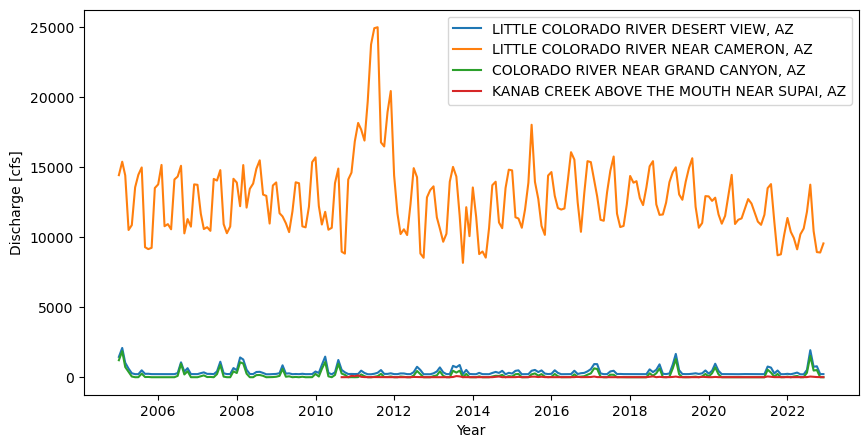

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

discharge_09402300 = '../data/29XXBUHc.txt'
discharge_09402500 = '../data/hEKc9AHL.txt'
discharge_09402000 = '../data/PdVY5_8t.txt'
discharge_09403850 = '../data/U0ImJT4n.txt'

df_09402300 = pd.read_table(discharge_09402300, sep='\t', skiprows=35)
df_09402300 = df_09402300[1:]
df_09402300['date'] = pd.to_datetime(df_09402300['year_nu'].astype(str) + '-' + df_09402300['month_nu'])
df_09402300.set_index('date')
df_09402300['mean_va'] = df_09402300['mean_va'].astype(float)

df_09402500 = pd.read_table(discharge_09402500, sep='\t', skiprows=35)
df_09402500 = df_09402500[1:]
df_09402500['date'] = pd.to_datetime(df_09402500['year_nu'].astype(str) + '-' + df_09402500['month_nu'])
df_09402500.set_index('date')
df_09402500['mean_va'] = df_09402500['mean_va'].astype(float)

df_09402000 = pd.read_table(discharge_09402000, sep='\t', skiprows=35)
df_09402000 = df_09402000[1:]
df_09402000['date'] = pd.to_datetime(df_09402000['year_nu'].astype(str) + '-' + df_09402000['month_nu'])
df_09402000.set_index('date')
df_09402000['mean_va'] = df_09402000['mean_va'].astype(float)

df_09403850 = pd.read_table(discharge_09403850, sep='\t', skiprows=35)
df_09403850 = df_09403850[1:]
df_09403850['date'] = pd.to_datetime(df_09403850['year_nu'].astype(str) + '-' + df_09403850['month_nu'])
df_09403850.set_index('date')
df_09403850['mean_va'] = df_09403850['mean_va'].astype(float)

df_09402300['SMA30'] = df_09402300['mean_va'].rolling(20).mean()
df_09402500['SMA30'] = df_09402500['mean_va'].rolling(20).mean()
df_09402000['SMA30'] = df_09402000['mean_va'].rolling(20).mean()
df_09403850['SMA30'] = df_09403850['mean_va'].rolling(20).mean()

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(df_09402300['date'], df_09402300['mean_va'], label='LITTLE COLORADO RIVER DESERT VIEW, AZ')
ax.plot(df_09402500['date'], df_09402500['mean_va'], label='LITTLE COLORADO RIVER NEAR CAMERON, AZ')
ax.plot(df_09402000['date'], df_09402000['mean_va'], label='COLORADO RIVER NEAR GRAND CANYON, AZ')
ax.plot(df_09403850['date'], df_09403850['mean_va'], label='KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge [cfs]')

plt.savefig('../figures/streamflow_multistation.png')

From this figure we can see when each station experiecnces a discharge peak. When there is a peak across all stations, this means that discharge increased across a large area of the river, and is more likely to impact the chub.

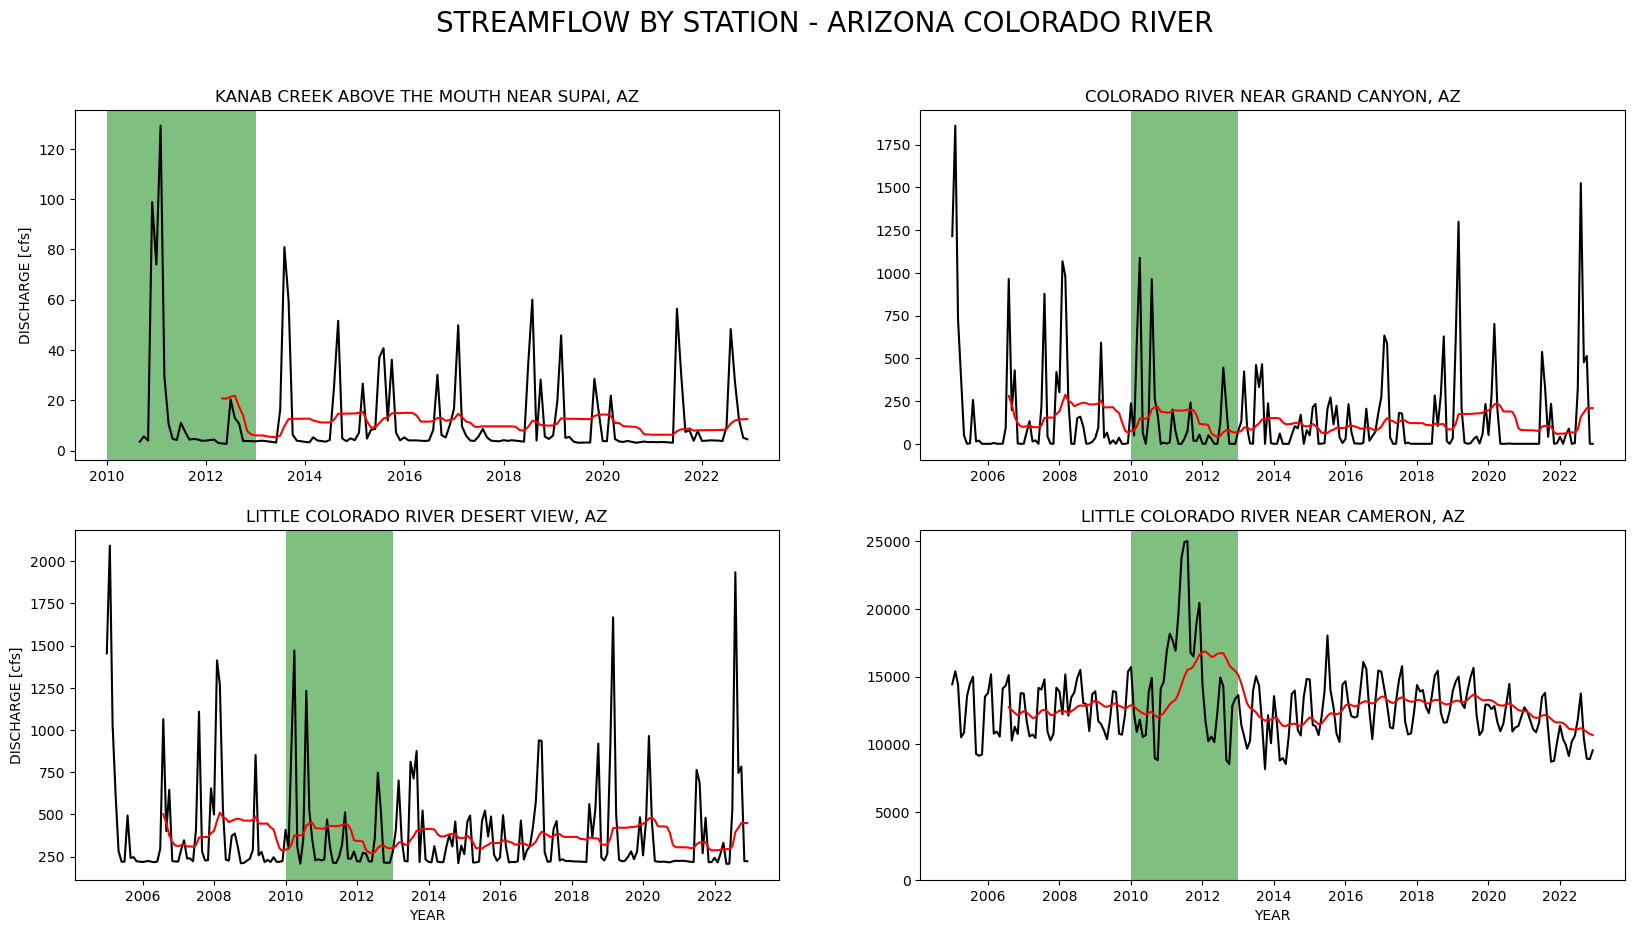

In [2]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('STREAMFLOW BY STATION - ARIZONA COLORADO RIVER', fontsize=20)

axes[0,0].plot(df_09403850['date'], df_09403850['mean_va'], c='k')
axes[0,0].set_title('KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')
axes[0,0].set_ylabel('DISCHARGE [cfs]')
axes[0,0].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[0,0].plot(df_09403850['date'], df_09403850['SMA30'], color='r')

axes[1,0].plot(df_09402300['date'], df_09402300['mean_va'], c='k')
axes[1,0].set_title('LITTLE COLORADO RIVER DESERT VIEW, AZ')
axes[1,0].set_ylabel('DISCHARGE [cfs]')
axes[1,0].set_xlabel('YEAR')
axes[1,0].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[1,0].plot(df_09402300['date'], df_09402300['SMA30'], color='r')

axes[0,1].plot(df_09402000['date'], df_09402000['mean_va'], c='k')
axes[0,1].set_title('COLORADO RIVER NEAR GRAND CANYON, AZ')
axes[0,1].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[0,1].plot(df_09402000['date'], df_09402000['SMA30'], color='r')

axes[1,1].plot(df_09402500['date'], df_09402500['mean_va'], c='k')
axes[1,1].set_title('LITTLE COLORADO RIVER NEAR CAMERON, AZ')
axes[1,1].set_ylim(0)
axes[1,1].set_xlabel('YEAR')
axes[1,1].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[1,1].plot(df_09402500['date'], df_09402500['SMA30'], color='r')

plt.savefig('../figures/seperated_streamflow.png')
plt.show()

This figure shows each measurement station in more detail to better help identify discharge peaks. From this we can see that there is a universal peak around 2010, indicating that the chub would experience higher water levels. A rolling window average of the streamflow peaks also shows a ripple effect of water levels from more upstream to lower-stream areas.

### Humpback Chub Population Characteristics

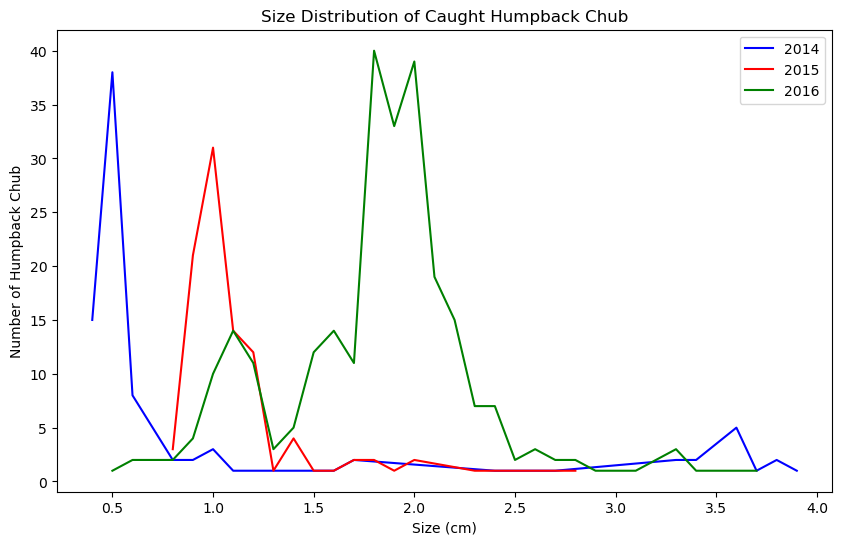

In [7]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Grabbing variables to plot against each other
total_length = '../data/HBC_Length_Freq_Fig4.csv'
total_length_df = pd.read_csv(total_length, usecols = ['Year', 'Total_Length'], skiprows=[1])

# Initialize empty lists for the chub lengths for each year
lengths_2014 = list()
lengths_2015 = list()
lengths_2016 = list()

# runs through each row in the data array, appends the length to the list that corresponds to the year
n = 0
while n < 456:
    year = total_length_df.iloc[n, 0]
    length = total_length_df.iloc[n, 1]
    if year == 2014:
        lengths_2014.append(length)
    if year == 2015:
        lengths_2015.append(length)
    if year == 2016:
        lengths_2016.append(length)
    n += 1

# Rounds the length values to the nearest 10th of a mm
# Converts mm to cm
def smooth(length):
    smooth = round(length / 10) * 10
    cm = smooth/100
    if cm < 0:
        cm = 0
    return cm

# Applies smoothing to the list of lengths
lengths_2014 = [smooth(x) for x in lengths_2014]
lengths_2015 = [smooth(x) for x in lengths_2015]
lengths_2016 = [smooth(x) for x in lengths_2016]

#Creates a data array with the length and number of chub at that length
lengths14, chubs14 = np.unique(lengths_2014, return_counts=True)
array_2014 = np.column_stack((lengths14, chubs14))

lengths15, chubs15 = np.unique(lengths_2015, return_counts=True)
array_2015 = np.column_stack((lengths15, chubs15))

lengths16, chubs16 = np.unique(lengths_2016, return_counts=True)
array_2016 = np.column_stack((lengths16, chubs16))

# Separates each array into two variables- length and count
x14 = array_2014[:, 0]
y14 = array_2014[:, 1]

x15 = array_2015[:, 0]
y15 = array_2015[:, 1]

x16 = array_2016[:, 0]
y16 = array_2016[:, 1]

# plot the length on the x axis and count on y axis
plt.figure(figsize=(10, 6))
plt.plot(x14, y14, label='2014', color='blue')
plt.plot(x15, y15, label='2015', color='red')
plt.plot(x16, y16, label='2016', color='green')

# Add labels and title
plt.xlabel('Size (cm)')
plt.ylabel('Number of Humpback Chub')
plt.title('Size Distribution of Caught Humpback Chub')
plt.legend()

# Save the figure
plt.savefig('../figures/size_distribution.png')

plt.show()

From this figure we can see that between 2014-2016, the size distribution of Chub increases. 

### Capture Site Locations

/var/folders/9r/2ldmzkgd19v7hkpt8w8nvmch0000gl/T/ipykernel_37296/248152078.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(downstream_lon, downstream_lat, 'bo', markersize=8, color='green', transform=ccrs.PlateCarree())


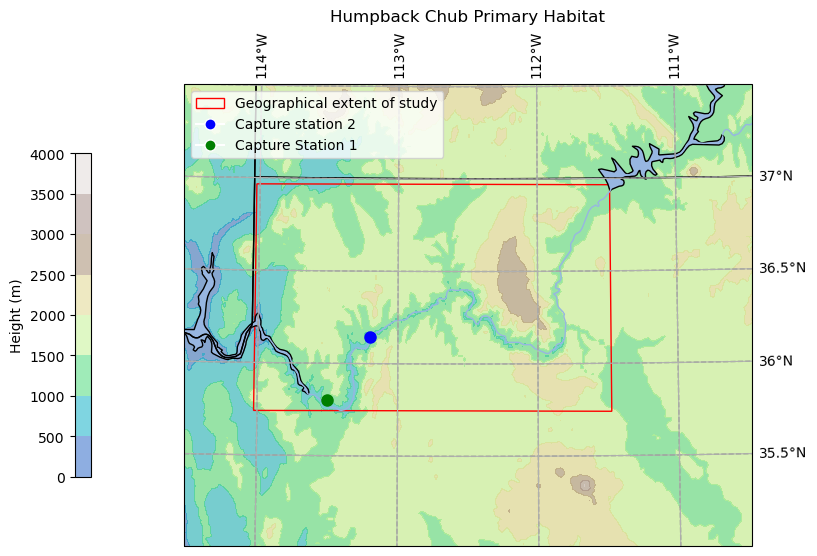

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import xarray as xr

extent = [-114.5, -110.5, 35, 37.5]  # New extent to zoom out
proj = ccrs.PlateCarree()

#load/add topo data
df_top = xr.open_dataset("~/Desktop/humpchub/ETOPO_2022_v1_60s_N90W180_bed.nc")
df_top = df_top.sel(lon=slice(-116, -108), lat=slice(34, 42))
latitude = df_top.lat.values
longitude = df_top.lon.values

z = df_top.z.values

central_lat = 37.5
central_lon = -96
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# ax.plot(lons, lats, color='red', linewidth=2, marker='o')

coords = [-114.02379, 35.740126, -111.476798, 36.965854]
min_lon, min_lat, max_lon, max_lat = coords

y = df_top.lat.values
x = df_top.lon.values
z = df_top.z.values

contour = ax.contourf(x, y, z, cmap='terrain', alpha=0.5, transform=proj)
plt.colorbar(contour, ax=ax, label='Height (m)', orientation='vertical', pad=.1, shrink=.7, location='left')

#add lon and lat gridlines
grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

# Draw the rectangle
rect = Rectangle((min_lon, min_lat), max_lon - min_lon, max_lat - min_lat,
                 linewidth=1, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

#plot stations
downstream_lon2 = -113.2
downstream_lat2 = 36.145
ax.plot(downstream_lon2, downstream_lat2, 'bo', markersize=8, transform=ccrs.PlateCarree())
downstream_lon = -113.505
downstream_lat = 35.8
ax.plot(downstream_lon, downstream_lat, 'bo', markersize=8, color='green', transform=ccrs.PlateCarree())

ax.set_extent(extent)

ax.set_title('Humpback Chub Primary Habitat')

legend_elements = [Rectangle((0, 0), 1, 1, edgecolor='red', facecolor='none', label='Geographical extent of study'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Capture station 2'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Capture Station 1')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_extent(extent)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.gridlines()
plt.show()
plt.savefig('../figures/Humpback_Chub_Study_Map.png')

This figure shows us where the data was collected in relation to the surrounding environment. The red box displays the geographical area that our study applies to. 

## Conclusion
### Findings and Implications
We noticed a positive coorelation between the temporal change in streamflow and the change in average length of monitered Humpback Chubs. This could be because of the increase in discharge in 2010.

### Limitations and Weaknesses
* Temporal misalignment <br>
Location data for catch locations isn't specific or widely distributed because of risks for poaching. <br>
* Complexity of ecosystem interactions <br>
Just because we see a correlation between size distribution and discharge doesn't mean there aren't other environmental factors that are also contributing to Chub population characteristics. <br>
* Geographical variability <br>
There is a significant difference between the discharge of the Colorado River and all of its branches, so while we can look at data for one and make estimated guesses about the other, we don't know for sure if the two are directly related. <br>
* Limited historical data <br>
We only have Chub length data for 2014-2016, so we don't know if the increasing size distribution is uncommon for the species or part of a long term cycle. 
* Ethical concerns <br>
Publishing data on endangered species always comes with the risk of making them more at risk for illegal hunting or negative human interaction.

### Acknowledgements
* Shout out to the Chub
* Grand Canyon
* Colorado River
* USGS
* Point of Contact Charles B. Yackulic